In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
#plt.style.use('./../../../MW_viz/matplotlib.mplstyle')

from mpl_toolkits.axes_grid1 import make_axes_locatable
import pyEXP

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
halos = ['Halo666', 'Halo719', 'Halo169', 'Halo975', 'Halo222', 'Halo170', 
         'Halo349', 'Halo983', 'Halo004', 'Halo327', 'Halo756', 'Halo407',
         'Halo282', 'Halo659', 'Halo747', 'Halo788', 'Halo113', 'Halo229']


In [3]:
halos_power = []
halos_times = []

for h in halos:
    power = pyEXP.coefs.Coefs.factory('../../data/NICO_COEFFS/Coefficients/{}_rotated_NEW.h5'.format(h)).Power()
    times = pyEXP.coefs.Coefs.factory('../../data/NICO_COEFFS/Coefficients/{}_rotated_NEW.h5'.format(h)).Times()
    halos_power.append(power)
    halos_times.append(times)

In [14]:
power_mean = np.zeros((len(halos), 6))

In [29]:
halos_power[i][0]

array([1.09607524e-01, 1.73906308e-03, 6.85976503e-04, 6.99621941e-05,
       3.82519777e-05, 8.72885239e-06])

In [53]:
halos_power[i][0]/halos_power[i][0][0]

array([1.00000000e+00, 1.58662746e-02, 6.25848004e-03, 6.38297367e-04,
       3.48990436e-04, 7.96373465e-05])

In [74]:
power_peris = np.zeros((len(halos), 6))
for i in range(len(halos)):
    peri = np.where(np.array(halos_times[i]) == 0.0)[0]
    #print(halos_power[i][peri])
    power_peris[i] = halos_power[i][peri]/halos_power[i][peri][0][0]
    power_mean[i]= np.mean(halos_power[i]/halos_power[i][0][0], axis=0)
    #print(power_peris[i], halos_power[i][peri])


In [75]:
power_mean.shape

(18, 6)

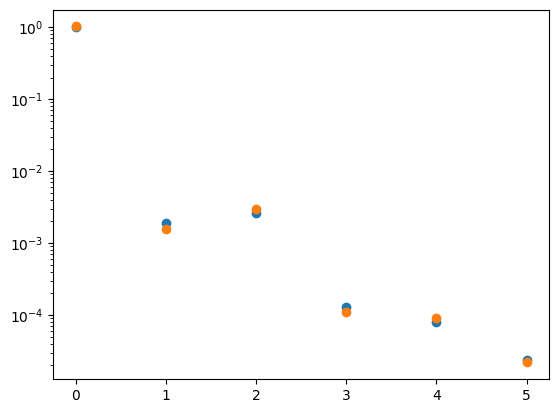

In [76]:
plt.scatter(np.arange(0, 6), np.mean(power_peris.T, axis=1))
plt.scatter(np.arange(0, 6), np.mean(power_mean.T, axis=1))

plt.yscale('log')
plt.show()

In [30]:
P_all_mean = np.loadtxt('../../data/NICO_COEFFS/power_in_coeffs.txt')

In [ ]:
#P_all_mean = np.loadtxt('../../data/NICO_COEFFS/power_in_coeffs.txt')

In [31]:
P_all_mean.shape

(6, 18)

In [32]:
l2s = np.argsort(P_all_mean[2])
Pl2 = np.zeros_like(P_all_mean)
for i in range(6):
    Pl2[i,:] = P_all_mean[i,l2s]

In [42]:
Halos_labels = ['Halo 666', 'Halo 719', 'Halo 169', 'Halo 975', 'Halo 222', 'Halo 170', 
                'Halo 349', 'Halo 983', 'Halo 004', 'Halo 327', 'Halo 756', 'Halo 407',
                'Halo 282', 'Halo 659', 'Halo 747', 'Halo 788', 'Halo 113', 'Halo 229']

Halos_labels_l2s = []
for i in range(len(l2s)):
    Halos_labels_l2s.append(Halos_labels[l2s[i]])
print(Halos_labels_l2s)

['Halo 747', 'Halo 407', 'Halo 113', 'Halo 719', 'Halo 169', 'Halo 983', 'Halo 756', 'Halo 222', 'Halo 327', 'Halo 349', 'Halo 666', 'Halo 282', 'Halo 975', 'Halo 170', 'Halo 004', 'Halo 229', 'Halo 659', 'Halo 788']


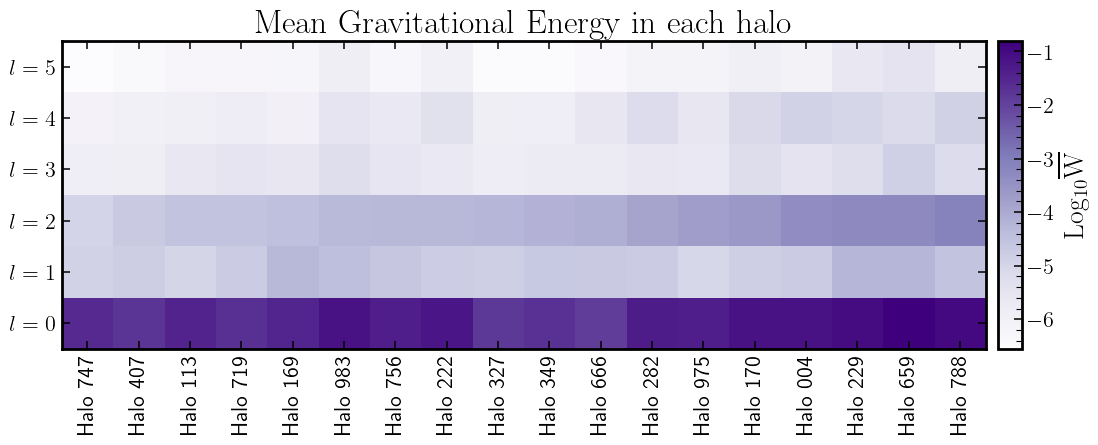

In [44]:



fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharey=False)
cbar1 = ax.imshow((Pl2), origin='lower', cmap='Purples')

ax.set_xticks(np.arange(0, 18, 1), Halos_labels_l2s, rotation=90)
ax.set_yticks(np.arange(0, 6, 1), [r'$l=0$', r'$l=1$', r'$l=2$', r'$l=3$', r'$l=4$', r'$l=5$'])


plt.tick_params(
axis='x',          # changes apply to the x-axis
which='minor',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
labelbottom=False) #

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False) #

cax = fig.add_axes([ax.get_position().x1 + 0.01,ax.get_position().y0,0.02,ax.get_position().y1-ax.get_position().y0])

ax.set_title(r'$\rm{Mean\ Gravitational\ Energy\ in\ each\ halo}$')
cb1 = fig.colorbar(cbar1, cax=cax, orientation='vertical')
#cb2 = fig.colorbar(cbar2, ax=ax[1], orientation='horizontal')

cb1.set_label(r'$\rm{Log_{10}} \overline{W}$')




plt.savefig('power_in_coefficients_l2s.png', bbox_inches='tight')
plt.savefig('power_in_coefficients_l2s.pdf', bbox_inches='tight')

plt.show()

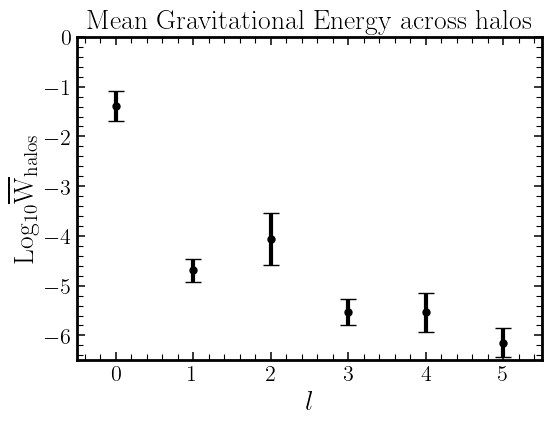

In [26]:
plt.plot(6,4)
plt.title(r'$\rm{Mean\ Gravitational\ Energy\ across\ halos}$', fontsize=20)
plt.errorbar(np.arange(0, 6), np.mean(P_all_mean, axis=1), yerr=np.std(P_all_mean, axis=1), c='k', fmt='o', capsize=6)
plt.xticks([0, 1, 2, 3, 4, 5])
plt.xlabel(r'$l$')
plt.ylabel(r'$\rm{Log_{10} \overline{W}_{halos}}$')
plt.ylim(-6.5, 0)
plt.xlim(-0.5, 5.5)
fig.set_facecolor('whitesmoke')
plt.savefig('mean_power_across_halos.pdf', bbox_inches='tight')
plt.show()
